# Análisis Exploratorio de Datos (EDA) de Spotify 


![logo](./logo-vector-spotify.jpg)

## 1. Introducción

En este proyecto realizaremos un análisis exploratorio de datos utilizando Python, utilizando información de la biblioteca de datos Kaggel sobre Spotify, que incluye información sobre canciones,artistas y características de las canciones.

## 2. Objetivo

Estudiar el comportamiento de la popularidad y el impacto del resto de variables para identificar conclusiones relevantes y significativas a través del análisis estadístico.

## 3. Hipótesis

1. Cuáles son los géneros musicales más populares?
2. ¿Las características musicales de una canción como la acústica, bailabilidad, tempo, etc, influyen significativamente en la popularidad?
3. ¿Qué característica músical impacta más en la popularidad?
4. ¿Qué relación tiene la duración de una canción con la popularidad?
5. ¿Las canciones más populares tiene un estado de ánimo positivo(balance cercano a 1?)
6. ¿Las canciones más populares tiene alta bailabilidad?
7. ¿Las canciones acústicas son populares?
8. ¿Las canciones en vivo son populares?
9. ¿Qué factores explican la popularidad de las canciones?

## 4. Importación de librerías

Usamos las siguientes librerías:

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest


from scipy.stats import stats
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import t
from scipy.stats import ttest_ind
import random
from scipy.stats import chi2_contingency

import warnings

warnings.filterwarnings('ignore')

In [145]:
# Elección de estilos gráficos:
# plt.style.available

# Pueden elegir uno de ellos y ejecutarlo de esta forma:
# plt.style.use("ggplot")

## 5. Importación de dataset

In [146]:
df_features = pd.read_csv('bbdd.csv')

### 5.1 Desripción de columnas de dataframe
| Columnas | Descripción |
|----------|----------|
|genre|género de la canción
|artist_name|Nombre del artista
|track_name|Nombre de la canción
|track_id|id de canción
|popularity|Cuanto mayor sea el valor, más popular será la canción, de 0 a 100,ponderada por la cercanía en el tiempo.
|acousticness|Cuanto mayor sea el valor, más acústica será la canción
|danceability|Cuanto mayor sea el valor, más fácil será bailar a esta canción.
|duration_ms|La duración de la canción en milisegundos
|energy|La energía de una canción, cuanto mayor sea el valor, más enérgico
|instrumentalness|Representa la cantidad de vocales en la canción. Más cerca a 1 es más instrumental.
|key|La tonalidad de la pista. Los números enteros se asignan a tonos utilizando la notación estándar Pitch Class. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1.
|liveness|Detecta la presencia de un público en la grabación. Los valores de en vivo (liveness) más altos representan una probabilidad mayor de que la pista se realizó en vivo.
|loudness|Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas. Los valores suelen oscilar entre -60 y 0 db.
|mode|Indica la modalidad (mayor o menor) de una sección, el tipo de escala del que se deriva su contenido melódico. Este campo contendrá un 0 para "menor", un 1 para "mayor" o un -1 para ningún resultado.
|speechiness|Detecta la presencia de palabras habladas en una pista. Cuanto más exclusiva sea la grabación similar a un discurso,más cerca del valor de atributo será 1.0
|tempo|El tempo total estimado de una pista en tiempos por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza dada y se deriva directamente de la duración media del ritmo.
|time_signature|El compás es una convención de notación que especifica cuántos tiempos hay en cada compás. El compás oscila entre 3 y 7, lo que indica compases de "3/4" a "7/4".
|valence|Cuanto mayor sea el valor, más positivo será el estado de ánimo de la canción.

## 6. Análisis de datos

### 6.1 Información general

In [147]:
#Obtenemos información general del dataframe a traves de info() y describe()
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [148]:
#Cuántas filas y columnas tiene nuestro dataframe?
df_features.shape

(232725, 18)

In [149]:
#Vista de primeros datos
df_features.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [150]:
#Análisis estadístico de variables númericas
df_features.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [151]:
#Análisis estadístico de variables tipo object
df_features.describe(include=object)

,genre,artist_name,track_name,track_id,key,mode,time_signature
count,232725,232725,232725,232725,232725,232725,232725
unique,27,14564,148615,176774,12,2,5
top,Comedy,Giuseppe Verdi,Home,3R73Y7X53MIQZWnKloWq5i,C,Major,4/4
freq,9681,1394,100,8,27583,151744,200760


De las 18 columnas, se observa que  tenemos 11 columnas númericas y 7 categóricas. 


In [152]:
#Existen nulos o NaN?
df_features.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [153]:
# Qué generos tenemos?
df_features['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [154]:
#Análisis de la variable género
df_features['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

Estandarizando los géneros Children's Music y Children’s Music para dejarlo en adelante como Children Music.

In [155]:
#Estandarizamos el género Children Music y lo comprobamos con size:
df_features['genre']=df_features['genre'].replace({"'":""},regex=True)
df_features['genre']=df_features['genre'].replace({"’":""},regex=True)
#calculamos la cantidad de géneros
df_features['genre'].unique().size

26

Convirtiendo el campo duration_ms de milisegundos a minutos(en decimales) y lo llamaremos duration_min.

In [156]:
df_features['duration_min'] = df_features['duration_ms'].apply (lambda x : round(x/60000,ndigits=1))
df_features.drop('duration_ms', inplace = True, axis=1)
df_features.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,1.7
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,2.3
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2.8
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,2.5
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1.4


### 6.2 Análisis gráfico univariante

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'duration_min'}>, <Axes: >]], dtype=object)

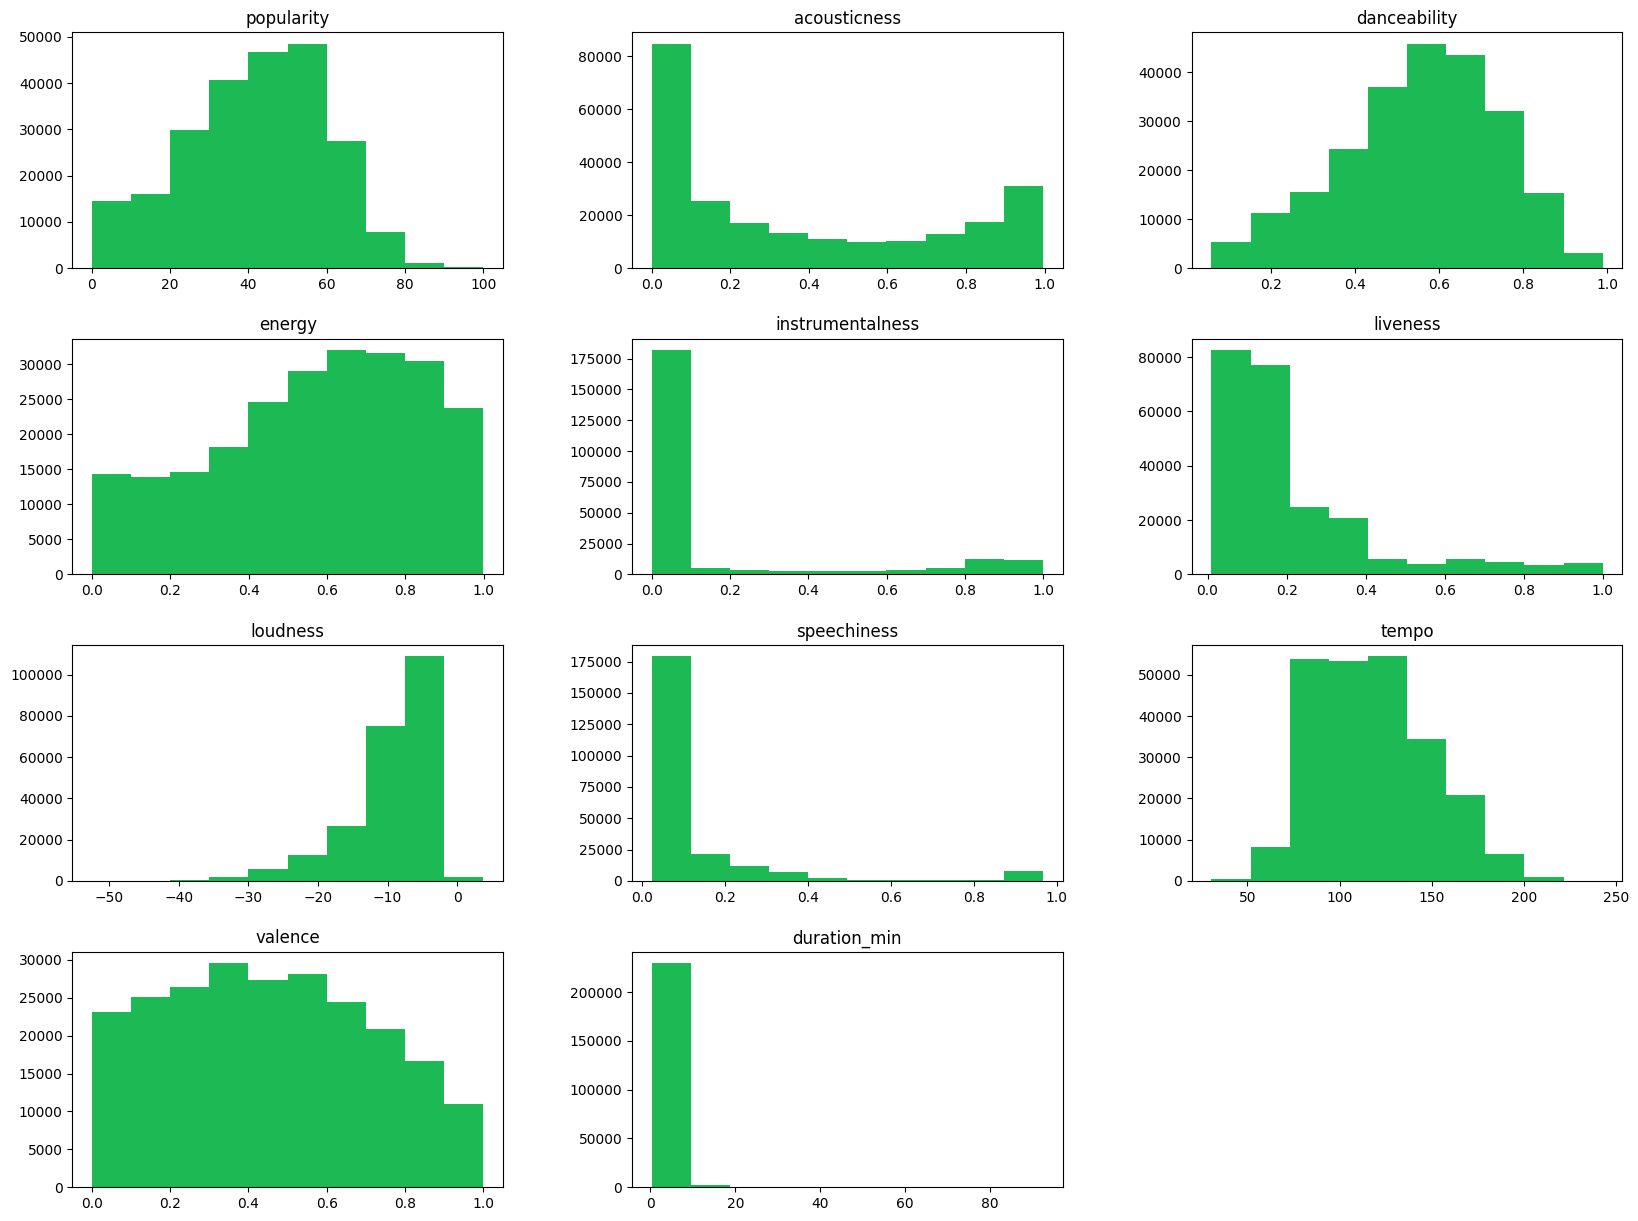

In [157]:
#Análisis gráfico de variables numéricas
verde = "#1DB954"
df_features.hist(figsize=(20,15),grid=False,color=verde)

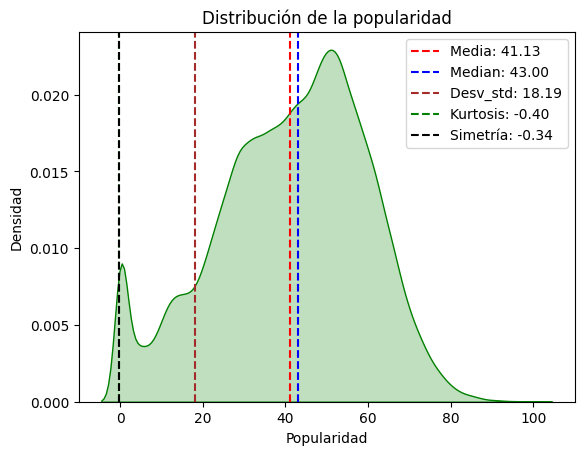

La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica negativa (sesgo hacia la izquierda).


In [158]:
from scipy.stats import kurtosis, skew

media = df_features['popularity'].mean()
median= df_features['popularity'].median()
variance= df_features['popularity'].var()
desv_std = df_features['popularity'].std()  
kurtosis_valor = kurtosis(df_features['popularity'])
simetria_valor = skew(df_features['popularity'])

sns.kdeplot(data=df_features, x='popularity',fill=True,color='green',)
# Agregar líneas verticales para las estadísticas
plt.axvline(media, color='red', linestyle='dashed', label=f'Media: {media:.2f}')
plt.axvline(median, color='blue', linestyle='dashed', label=f'Median: {median:.2f}')
plt.axvline(desv_std, color='brown', linestyle='dashed', label=f'Desv_std: {desv_std:.2f}')
plt.axvline(kurtosis_valor, color='green', linestyle='dashed', label=f'Kurtosis: {kurtosis_valor:.2f}')
plt.axvline(simetria_valor, color='black', linestyle='dashed', label=f'Simetría: {simetria_valor:.2f}')
plt.title('Distribución de la popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Densidad')

plt.legend()

plt.show()
# Interpretación de los valores
if kurtosis_valor > 3:
    print("La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.")
elif kurtosis_valor < 3:
    print("La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.")
else:
    print("La distribución es mesocúrtica, similar a una distribución normal.")

if simetria_valor > 0:
    print("La distribución es asimétrica positiva (sesgo hacia la derecha).")
elif simetria_valor < 0:
    print("La distribución es asimétrica negativa (sesgo hacia la izquierda).")
else:
    print("La distribución es perfectamente simétrica alrededor de su media.")


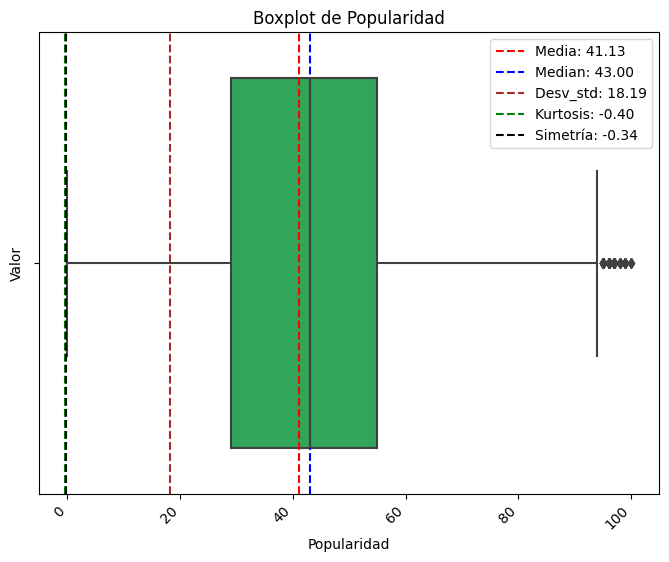

In [159]:
# Crear el gráfico de caja
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_features, x='popularity', ax=ax,color=verde)
plt.axvline(media, color='red', linestyle='dashed', label=f'Media: {media:.2f}')
plt.axvline(median, color='blue', linestyle='dashed', label=f'Median: {median:.2f}')
plt.axvline(desv_std, color='brown', linestyle='dashed', label=f'Desv_std: {desv_std:.2f}')
plt.axvline(kurtosis_valor, color='green', linestyle='dashed', label=f'Kurtosis: {kurtosis_valor:.2f}')
plt.axvline(simetria_valor, color='black', linestyle='dashed', label=f'Simetría: {simetria_valor:.2f}')
# Agregar etiquetas al eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',)
ax.set_xlabel('Popularidad')
ax.set_ylabel('Valor')

# Configurar el título
ax.set_title('Boxplot de Popularidad')
plt.legend()
# Mostrar el gráfico
plt.show()

In [160]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_features['popularity'].quantile(0.25)
Q3 = df_features['popularity'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df_features[(df_features['popularity'] < lower_limit) | (df_features['popularity'] > upper_limit)]

# Mostrar los outliers

outliers.shape

(38, 18)

# Centrando la columna

In [161]:
popularity_diff=pd.DataFrame(df_features['popularity']).copy()
popularity_diff['popularity_diff'] = popularity_diff['popularity'].diff()

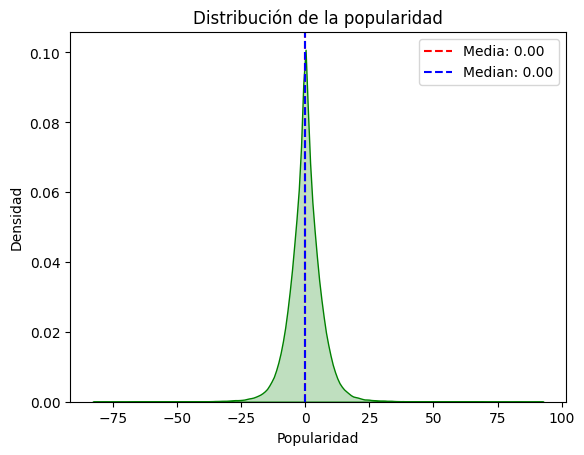

In [162]:
  # Rellenar el primer valor
media_diff = popularity_diff['popularity_diff'].mean()
median_diff= popularity_diff['popularity_diff'].median()
# Calcular las diferencias de primer orden en la columna '_diff'


sns.kdeplot(data=popularity_diff, x='popularity_diff',fill=True,color='green',)

# Agregar líneas verticales para la media y la moda
plt.axvline(media_diff, color='red', linestyle='dashed', label=f'Media: {media_diff:.2f}')
plt.axvline(median_diff, color='blue', linestyle='dashed', label=f'Median: {median_diff:.2f}')

plt.title('Distribución de la popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

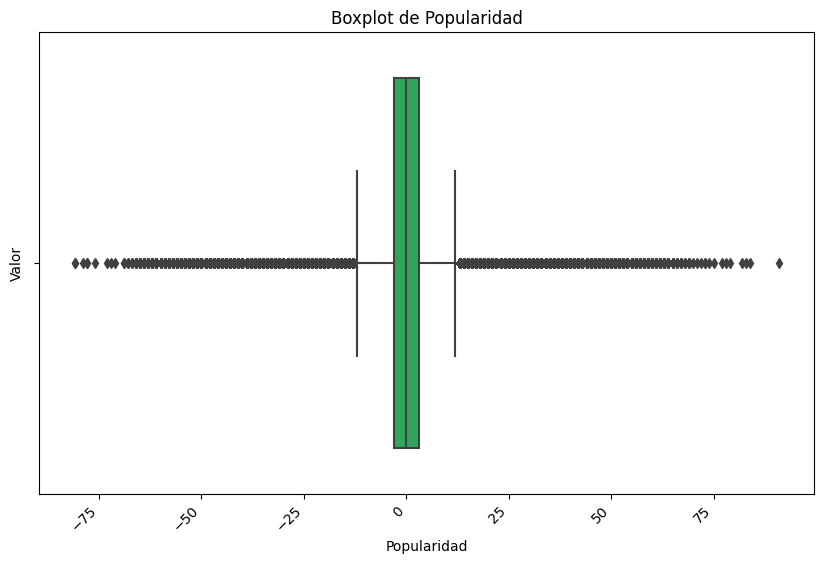

In [163]:
# Crear el gráfico de caja
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=popularity_diff, x='popularity_diff', ax=ax,color=verde)

# Agregar etiquetas al eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',)
ax.set_xlabel('Popularidad')
ax.set_ylabel('Valor')

# Configurar el título
ax.set_title('Boxplot de Popularidad')

# Mostrar el gráfico
plt.show()


In [164]:
# Calcular el rango intercuartílico (IQR)
Q1 = popularity_diff['popularity_diff'].quantile(0.25)
Q3 = popularity_diff['popularity_diff'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar los outliers
outliers_diff = df_features[(popularity_diff['popularity_diff'] < lower_limit) | (popularity_diff['popularity_diff'] > upper_limit)]

# Mostrar los outliers
outliers_diff.shape


(15421, 18)

Observan algo sospechoso?

In [165]:
df_features[['track_id','track_name']].value_counts().head(20)

track_id                track_name                 
0UE0RhnRaEYsiYgXpyLoZc  Hallucinations                 8
3R73Y7X53MIQZWnKloWq5i  Monte Carlo (feat. WET)        8
6sVQNUvcVFTXvlk3ec0ngd  Cherry-coloured Funk           8
3uSSjnDMmoyERaAK9KvpJR  Too Deep                       8
0wY9rA9fJkuESyYm9uzVK5  D'Evils                        8
6AIte2Iej1QKlaofpjCzW1  With Me                        8
4Vha0YyxRZSfLzzoph7rNx  Body Smile                     7
3nXrCAE44KlevAkQB2XWcN  Gonna Love Me                  7
4hh1lvWiUaLMOcVXhyK6TA  Dear To Me                     7
4L1eqdFY10yO7tMzvRp0sx  Mood                           7
2T64m94VBrsEISkAYq6Cnq  Cooks                          7
5E5HYgxGMp3BPakHGfKfIB  Roadrunner                     7
0IvQCuL8N4158edtz98LCL  Wasted Acres                   7
1tzPSule9WZ9B8SujHv8fp  This Head I Hold               7
7MPSPxCd6aiGZwN0ro0ZSH  Breathless                     7
1Z2MfAx1nJ09NzGjodnvRW  Screwed (feat. Zoë Kravitz)    7
5v6fwkgHeF0N32LmEoQyQB  TenTwentyTen

### 6.2.1 Los 10 géneros más frecuentes...

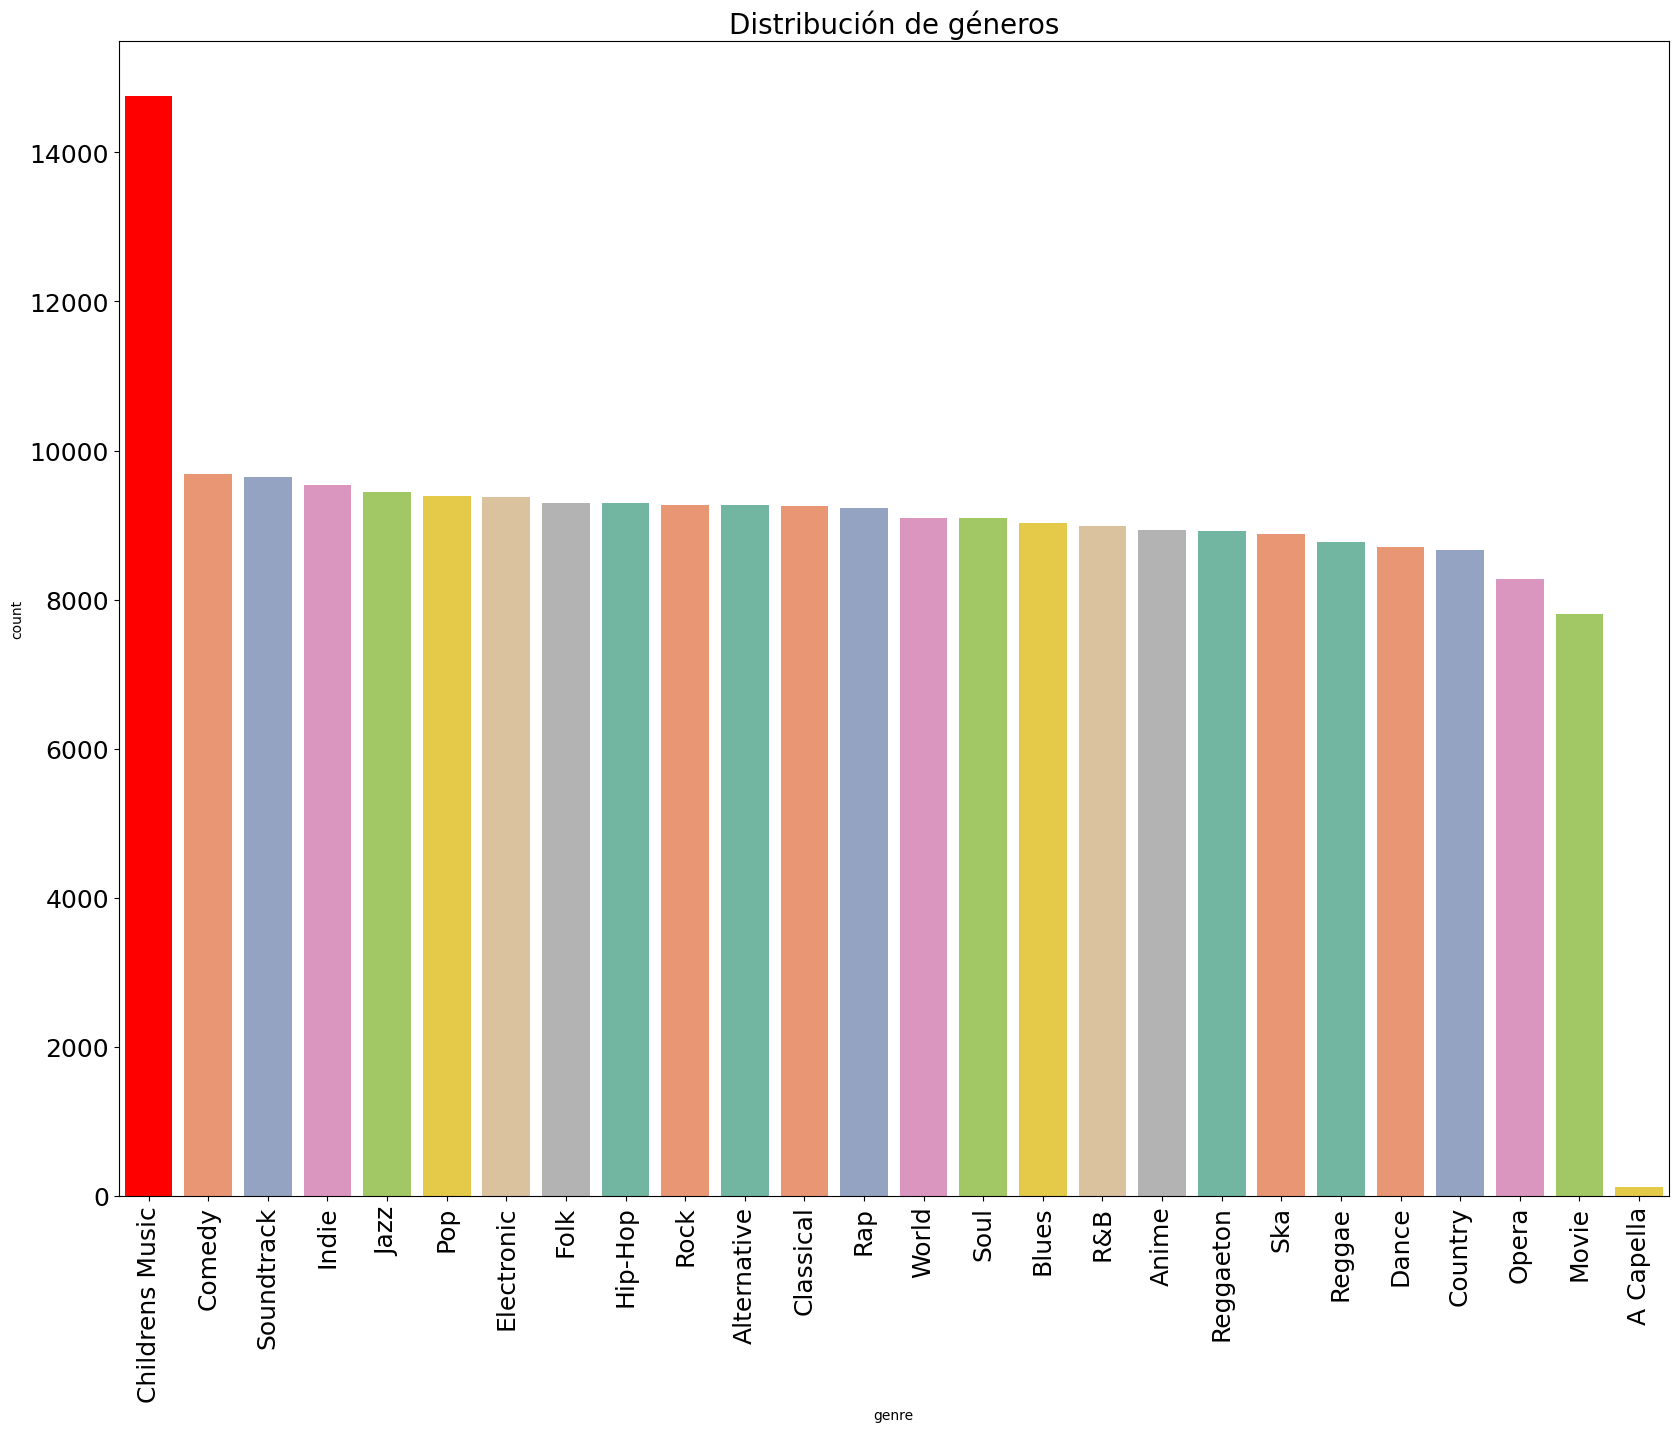

In [166]:
### ¿Cuál es el género más frecuente?
generosfrecuentes10 = df_features['genre'].value_counts()
categorias = generosfrecuentes10.index.tolist()
colors = sns.color_palette('Set2', 10)
ax = sns.countplot(x='genre', data=df_features, order=categorias,palette=colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=12)
ax.set_title('Distribución de géneros', fontsize=20)
ax.patches[0].set_fc('r')
ax.tick_params(axis='both', labelsize=18)
ax.set_facecolor('white')
plt.gcf().set_size_inches(20, 15)
plt.show()

### *Highlights sobre frecuencia de géneros:*

*El género que más se repite es **Childrens Music** seguido de **Comedy**, **Sound track**, **Indie**, **Jazz**,**etc**.*

### 6.2.2 Los 10 artistas más frecuentes...

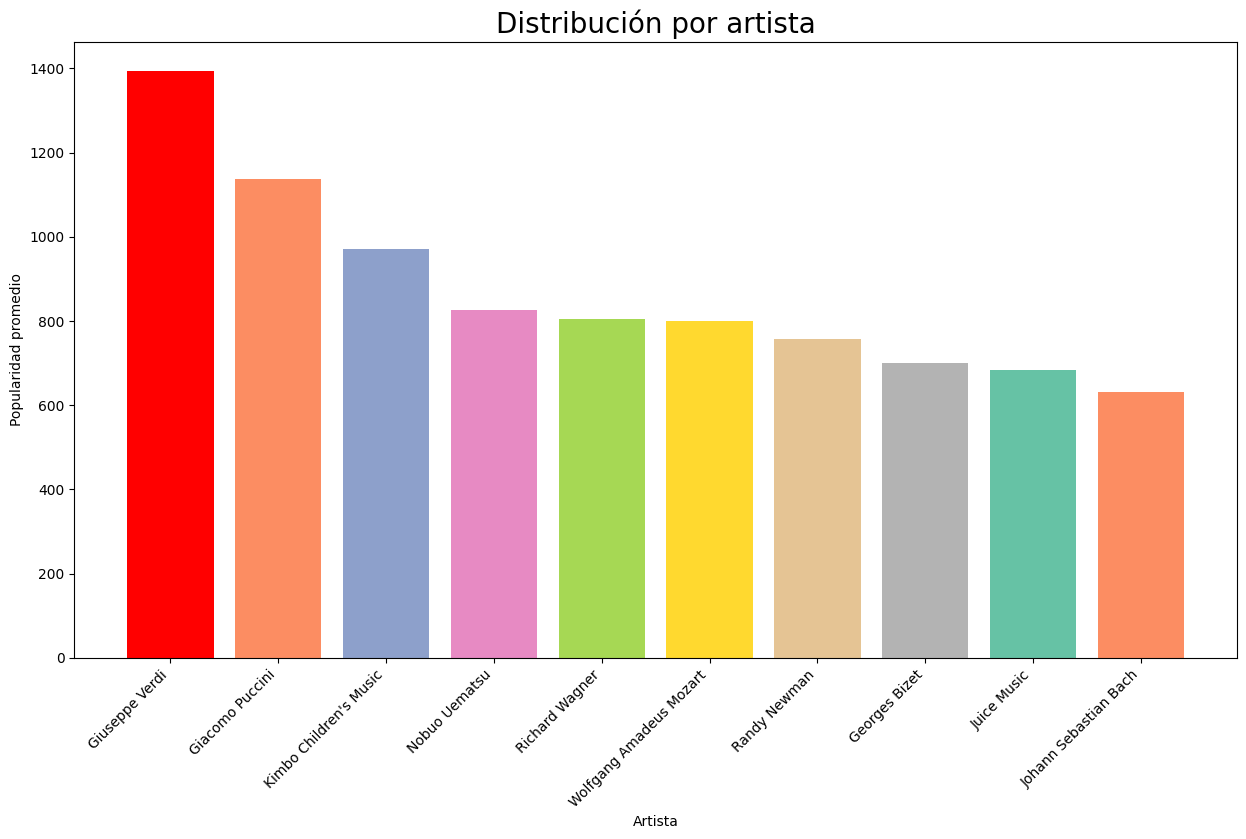

In [167]:
### ¿Cuál es el artista más frecuente?
ranking_artistas=df_features.groupby('artist_name')['artist_name'].count().sort_values(ascending = False).head(10)
colors = sns.color_palette('Set2', 10)
fig, ax =plt.subplots(figsize=(15, 8))
ax.bar(ranking_artistas.index, ranking_artistas.values,color=colors)
ax.set_title('Distribución por artista',fontsize=20)
ax.patches[0].set_fc('r')
ax.set_xlabel('Artista')
ax.set_ylabel('Popularidad promedio')
ax.set_facecolor('white')
plt.xticks(rotation=45, ha='right')
plt.show()

### *Highlights sobre frecuencia de géneros:*

*El artista que más aparece es **Giuseppe Verdi** seguido de **Giacomo Puccini**, **Kimbo Children Music**, **Nobuo Uematsu**, **Richard Wagner**,**etc**.*

### 6.3 Análisis bivariante ###

### 6.3.1 Análisis de correlación ###

In [168]:
#Análisis de correlación de variables
correlacion_global=df_features.corr()
correlacion_global

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_min
popularity,1.000000,-0.381295,0.256564,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076,0.002397
acousticness,-0.381295,1.000000,-0.364546,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798,0.011147
danceability,0.256564,-0.364546,1.000000,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154,-0.125711
energy,0.248922,-0.725576,0.325807,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771,-0.030497
instrumentalness,-0.210983,0.316154,-0.364941,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522,0.076007
liveness,-0.167995,0.069004,-0.041684,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804,0.023738
loudness,0.363011,-0.690202,0.438668,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901,-0.047570
speechiness,-0.151076,0.150935,0.134560,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842,-0.016219
tempo,0.081039,-0.238247,0.021939,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857,-0.028460
valence,0.060076,-0.325798,0.547154,0.436771,-0.307522,0.011804,0.399901,0.023842,0.134857,1.000000,-0.141759


Qué caracterísiticas musicales tiene una canción bailable?

<Axes: >

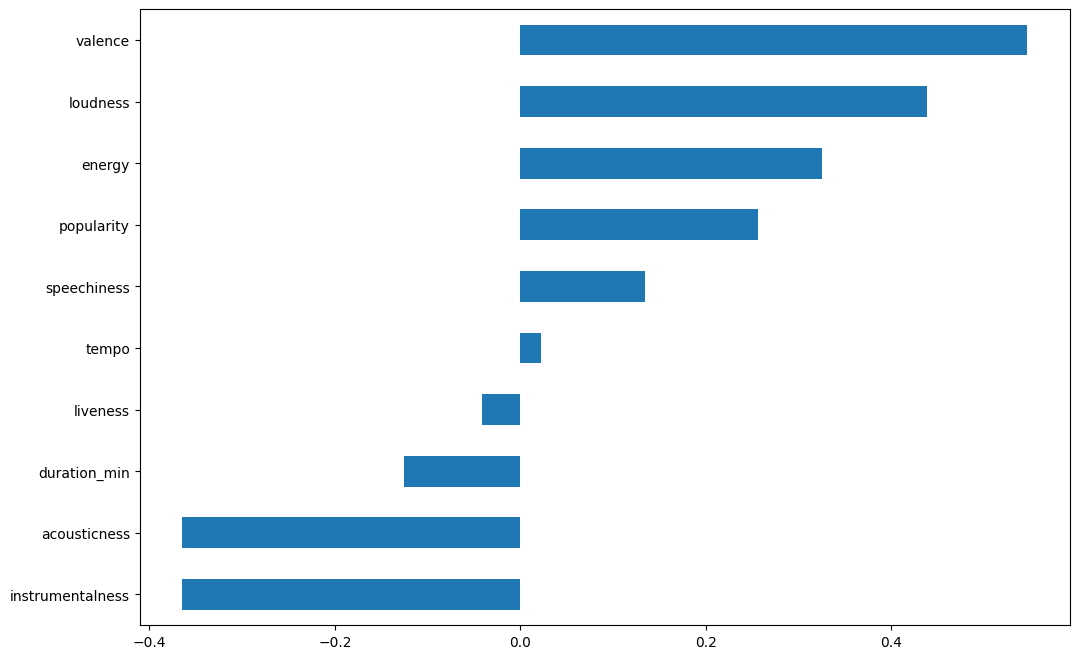

In [169]:
#Análisis de correlación de variables
correlacion_global.loc['danceability',].drop('danceability').sort_values().plot(kind='barh',figsize=(12,8))

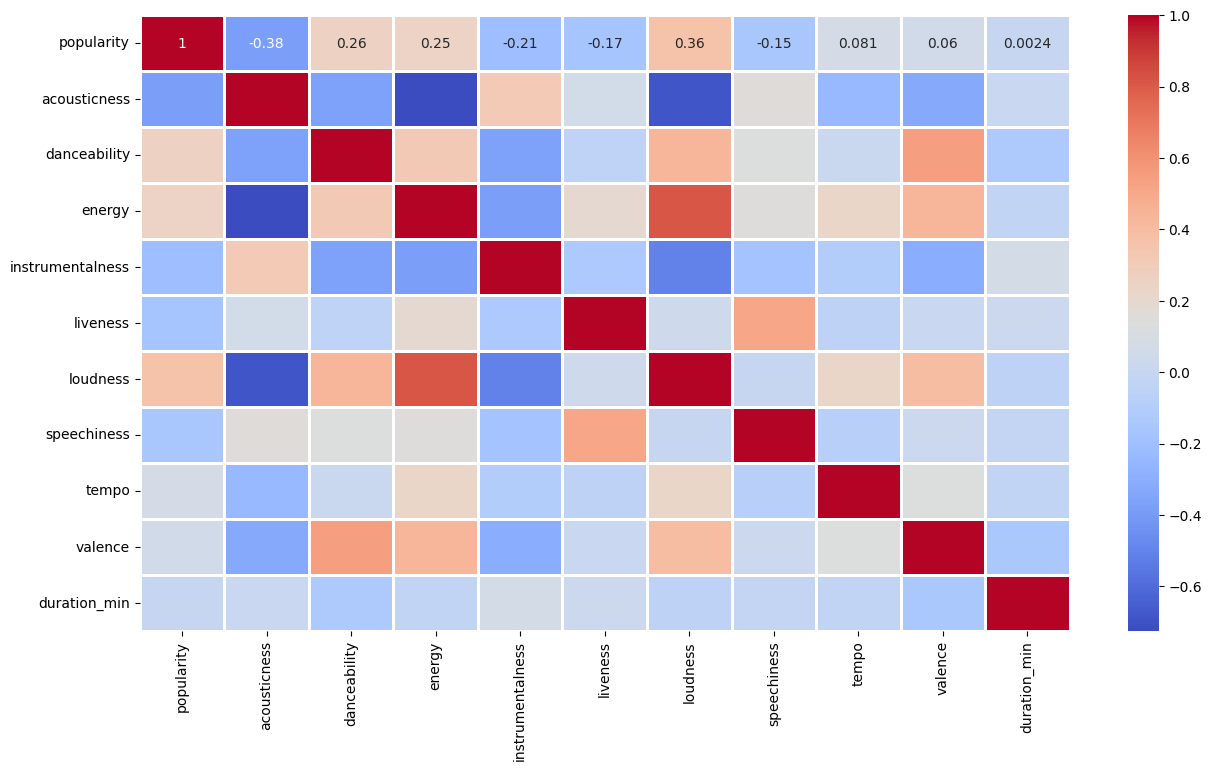

In [170]:
fig, ax =plt.subplots(figsize=(15, 8))
sns.heatmap(data=correlacion_global, cmap='coolwarm', linewidths=1, annot=True,)
plt.show()

### *Highlights sobre correlación de variables:*

*-Las variables se tienen mayor correlación con la popularidad son:*

    1. Acousticness -----> (-)38%
    2. Loudness ---------> (+)36%
    3. Danceability -----> (+)26%
    4. Energy -----------> (+)25%
    5. Liveness ---------> (-)21%


Ya que una de nuestras variables relevantes en el EDA es la popularidad, podemos identificar que acousticness, energy, danceability y loudness son las variable que muestran mayor correlación. En adelante centraremos el análisis sobre estas variables y sus relación con la popularidad

### 6.3.2 Los 10 artistas más populares(en promedio)...

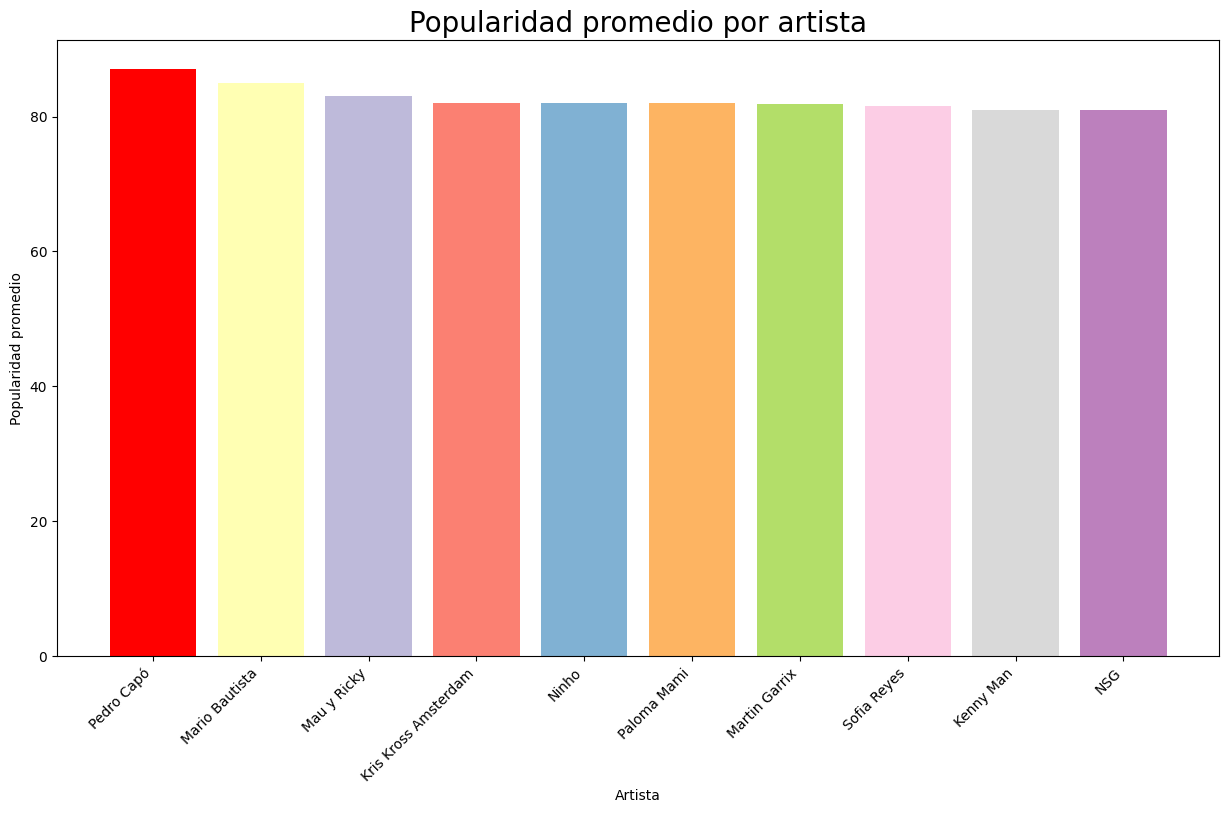

In [171]:
ranking_artistas=df_features.groupby('artist_name')['popularity'].mean().sort_values(ascending = False).head(10)
colors = sns.color_palette('Set3', 10)
fig, ax =plt.subplots(figsize=(15, 8))
ax.bar(ranking_artistas.index, ranking_artistas.values,color=colors)
ax.patches[0].set_fc('r')
ax.set_title('Popularidad promedio por artista',fontsize=20)
ax.set_xlabel('Artista')
ax.set_ylabel('Popularidad promedio')
ax.set_facecolor('white')
plt.xticks(rotation=45, ha='right')
plt.show()

*Highlights sobre popularidad de artistas:*

*El artista más popular es  **Pedro Capó** seguido de **Mario Bautista**, **Mau y Ricky**, **Kris Kross Amsterdam**, **Ninho**,**etc**.*

### 6.3.3 Las 10 canciones más populares(promedio)... 

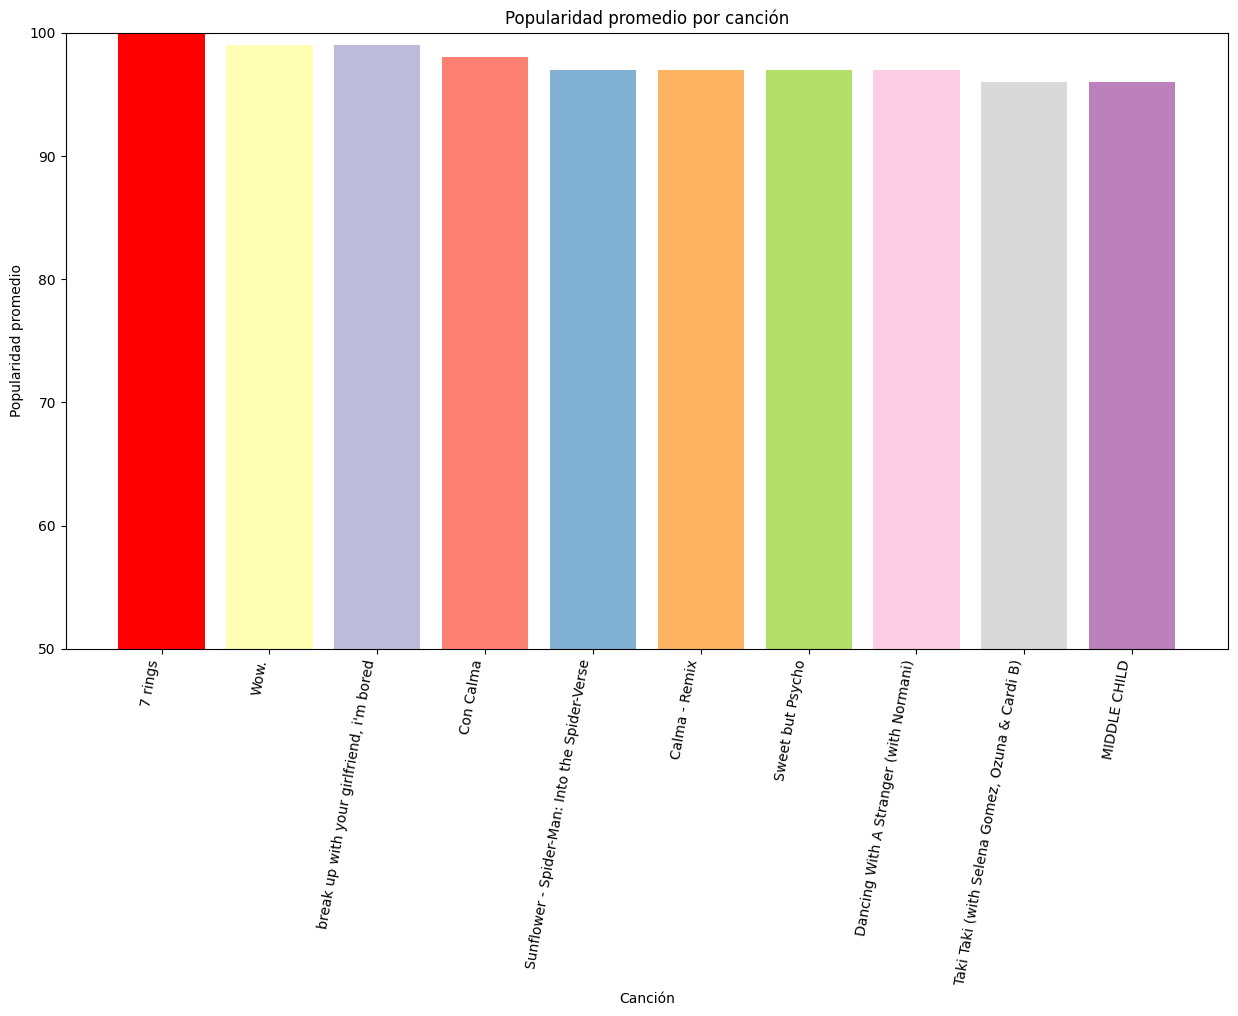

In [172]:
ranking_canciones = df_features.groupby('track_name')['popularity'].mean().sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(ranking_canciones.index, ranking_canciones.values,color=colors)
ax.patches[0].set_fc('r')
ax.set_title('Popularidad promedio por canción')
ax.set_xlabel('Canción')
ax.set_ylabel('Popularidad promedio')
ax.set_ylim([50, 100])
ax.set_facecolor('white')
plt.xticks(rotation=80, ha='right')
plt.show()

### *Highlights sobre popularidad de canciones:*

*La canción más popular es  **7 rings** seguido de **Wow**, **Break up with your girlfiend, i'm bored**, **Con calma**, **Sunflower**,**etc**.*

### 6.3.4 Los 10 géneros más populares(en promedio)...

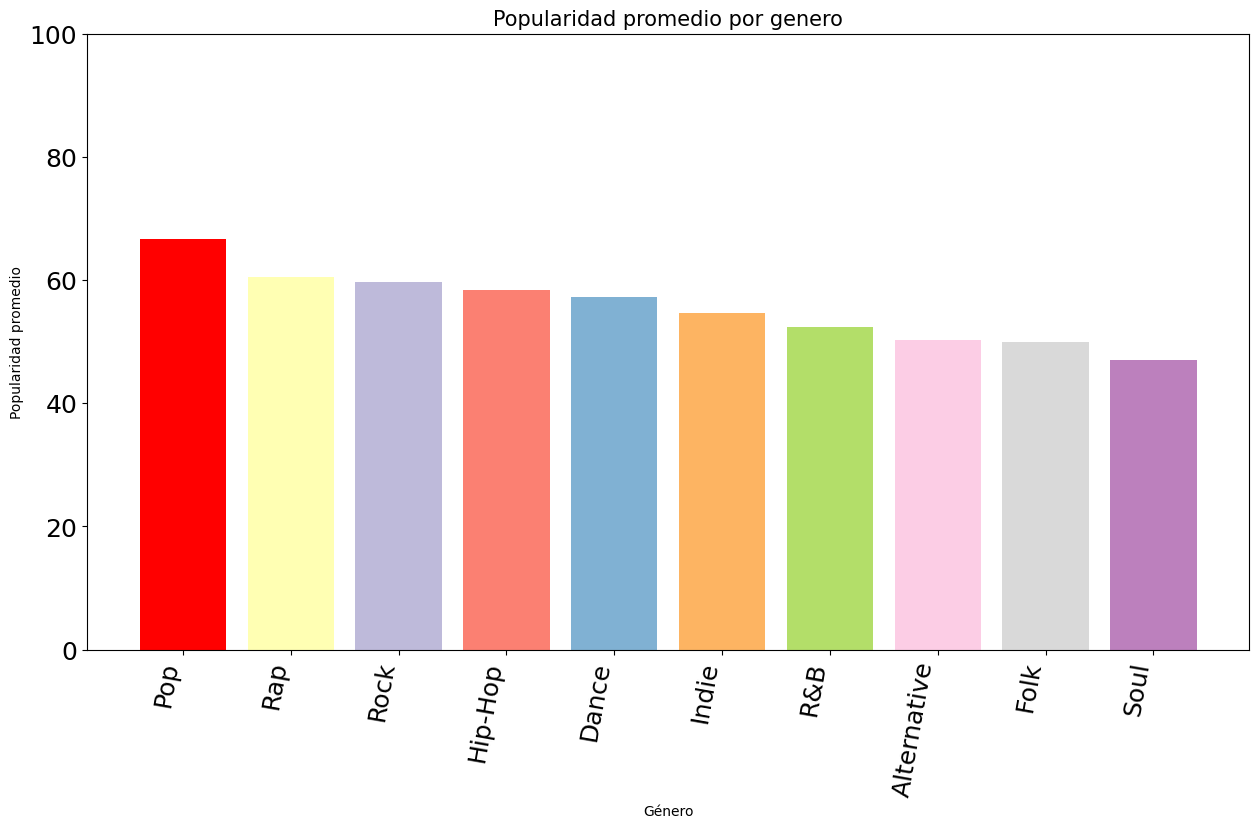

In [173]:
ranking_generos = df_features.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)
colors = sns.color_palette('Set3', 10)
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(ranking_generos.index, ranking_generos.values,color=colors)
ax.set_title('Popularidad promedio por genero', fontsize=15)
ax.patches[0].set_fc('r')

ax.tick_params(axis='both', labelsize=18)
ax.set_xlabel('Género')
ax.set_ylabel('Popularidad promedio')
ax.set_ylim([0, 100])
ax.set_facecolor('white')
plt.xticks(rotation=80, ha='right')
plt.show()

### *Highlights sobre popularidaad de géneros:*

*El género más popular es el **Pop** seguido del **Rap**, **Rock**, **Hip-Hop**, **Dance**,**etc**.*

Creando un dataframe de los 5 géneros más populares para identificar patrones o comportamientos que nos permitan establecer una relación con la popularidad de sus canciones.

***6.3.5 Analizando cómo se comportan los 5 géneros elegidas***

Text(0, 0.5, 'Densidad')

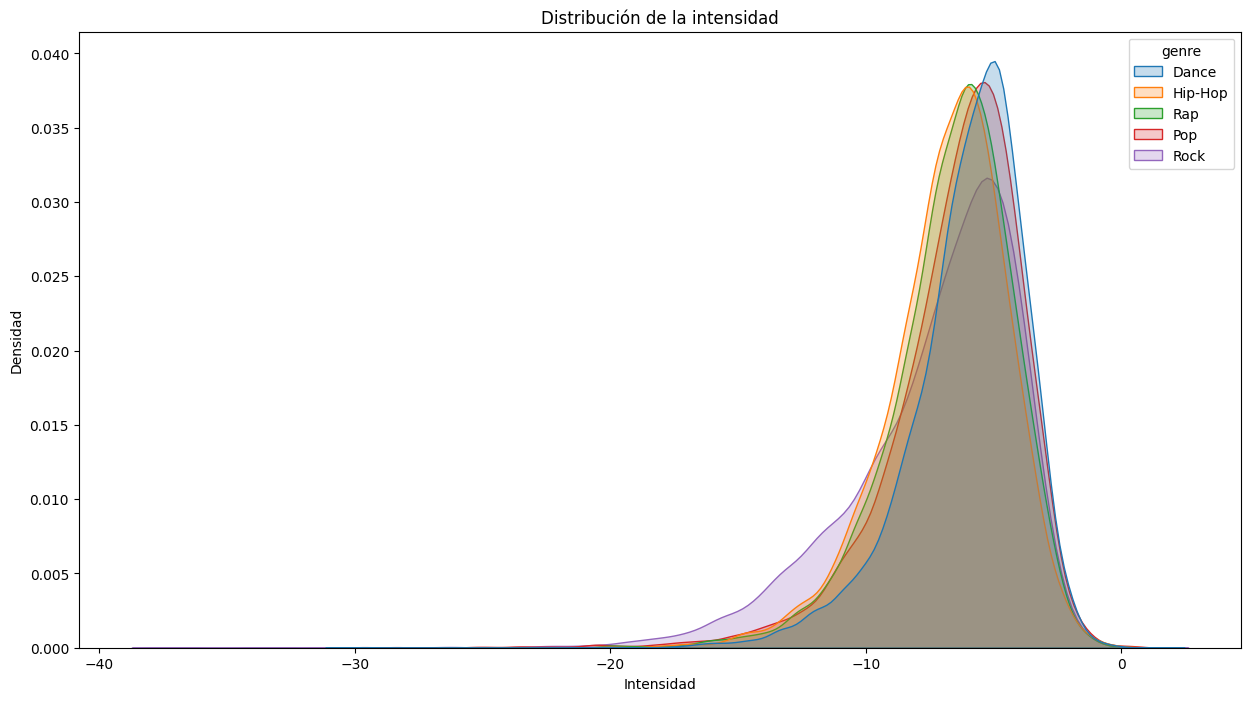

In [174]:
top5genres = ['Pop', 'Rap', 'Rock', 'Hip-Hop', 'Dance']
df_features_top5genres = df_features[df_features['genre'].isin(top5genres)]
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(data=df_features_top5genres, x='loudness', hue='genre', fill=True)
plt.title('Distribución de la intensidad')
plt.xlabel('Intensidad')
plt.ylabel('Densidad')

Text(0, 0.5, 'Densidad')

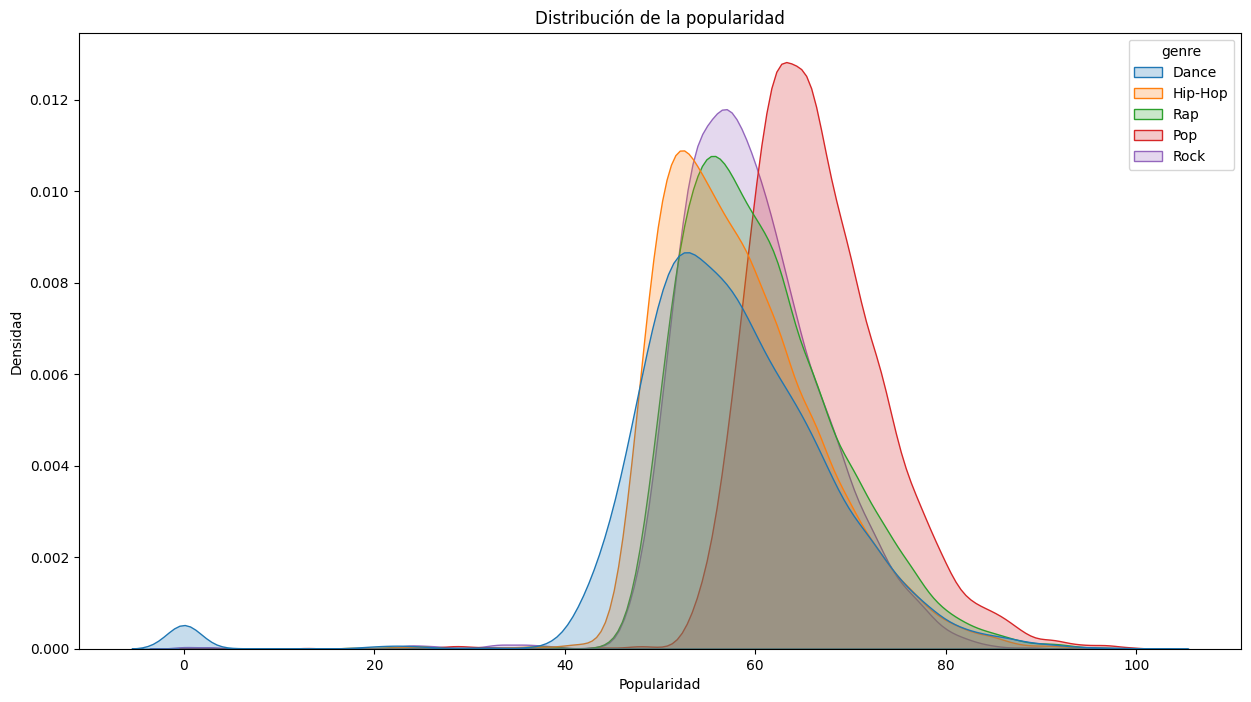

In [175]:
df_features_top5genres = df_features[df_features['genre'].isin(top5genres)]
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(data=df_features_top5genres, x='popularity', hue='genre', fill=True)
plt.title('Distribución de la popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Densidad')

Text(0, 0.5, 'Densidad')

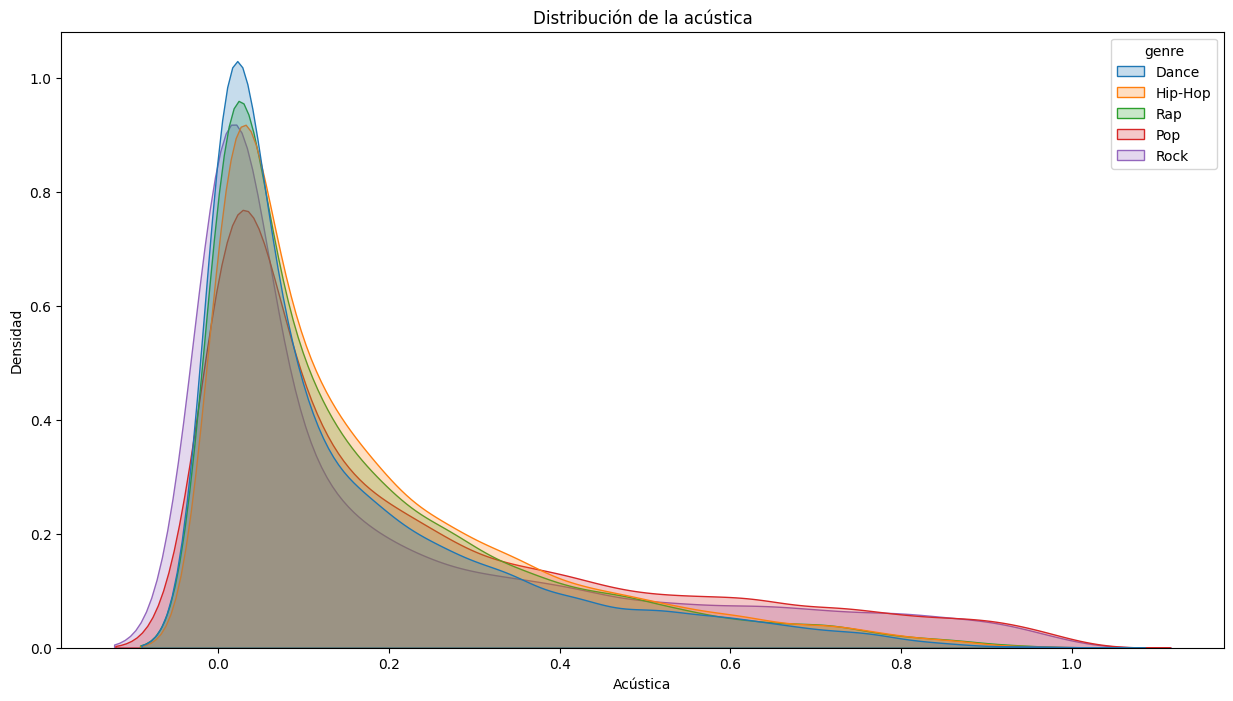

In [176]:
df_features_top5genres = df_features[df_features['genre'].isin(top5genres)]
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(data=df_features_top5genres, x='acousticness', hue='genre', fill=True)
plt.title('Distribución de la acústica')
plt.xlabel('Acústica')
plt.ylabel('Densidad')

Text(0, 0.5, 'Densidad')

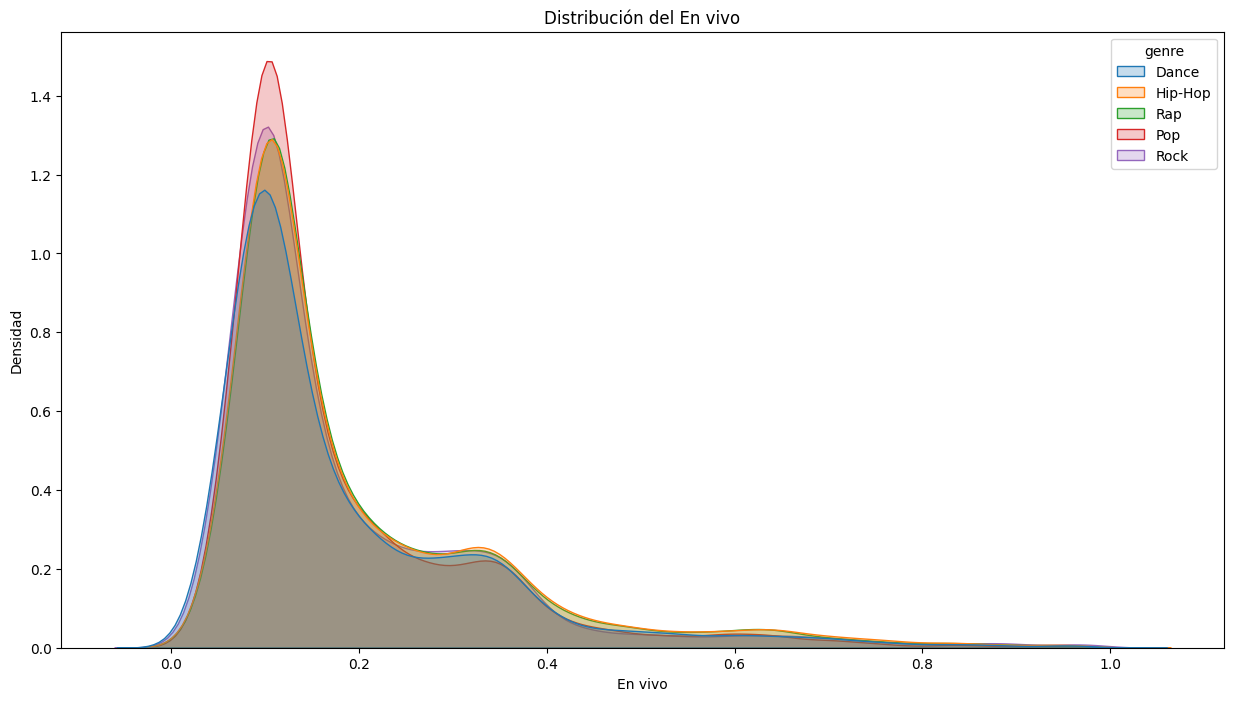

In [177]:
df_features_top5genres = df_features[df_features['genre'].isin(top5genres)]
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(data=df_features_top5genres, x='liveness', hue='genre', fill=True)
plt.title('Distribución del En vivo')
plt.xlabel('En vivo')
plt.ylabel('Densidad')

Text(0, 0.5, 'Densidad')

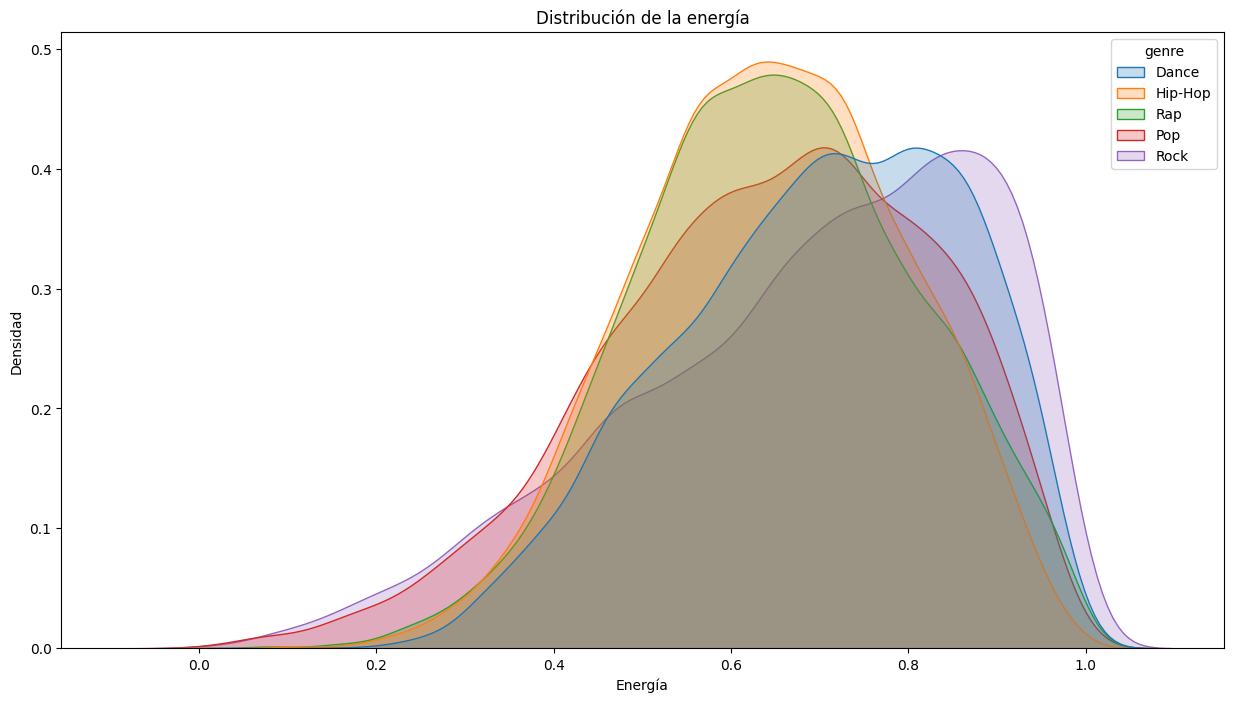

In [178]:
df_features_top5genres = df_features[df_features['genre'].isin(top5genres)]
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(data=df_features_top5genres, x='energy', hue='genre', fill=True)
plt.title('Distribución de la energía')
plt.xlabel('Energía')
plt.ylabel('Densidad')

En base a los highlighs, podemos focalizar el análisis en los géneros que mayor impacto tienen en la popularidad de las canciones. 

Creando un dataframe de los 5 géneros más populares para identificar patrones o comportamientos que nos permitan establecer una relación con la popularidad de sus canciones.

In [179]:
#Creando dataframe de los 5 géneros más populares
top5genres = ['Pop', 'Rap', 'Rock', 'Hip-Hop', 'Dance']
df_features_top5genres=df_features[df_features['genre'].isin(top5genres)]
df_features_top5genres.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,3.2
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,3.0
9028,Dance,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,97,0.2970,0.752,0.488,0.000009,F#,0.0936,-7.050,Major,0.0705,136.041,4/4,0.533,3.4
9029,Dance,Ariana Grande,needy,1TEL6MlSSVLSdhOSddidlJ,92,0.7800,0.647,0.309,0.000007,G,0.2020,-7.948,Minor,0.0366,87.045,4/4,0.195,2.9
9030,Dance,Ariana Grande,NASA,4uTvPEr01pjTbZgl7jcKBD,91,0.4510,0.747,0.458,0.000000,F#,0.2520,-6.891,Major,0.3030,75.029,4/4,0.470,3.0


### 6.3.6 Análisis de correlación de géneros top vs Popularidad

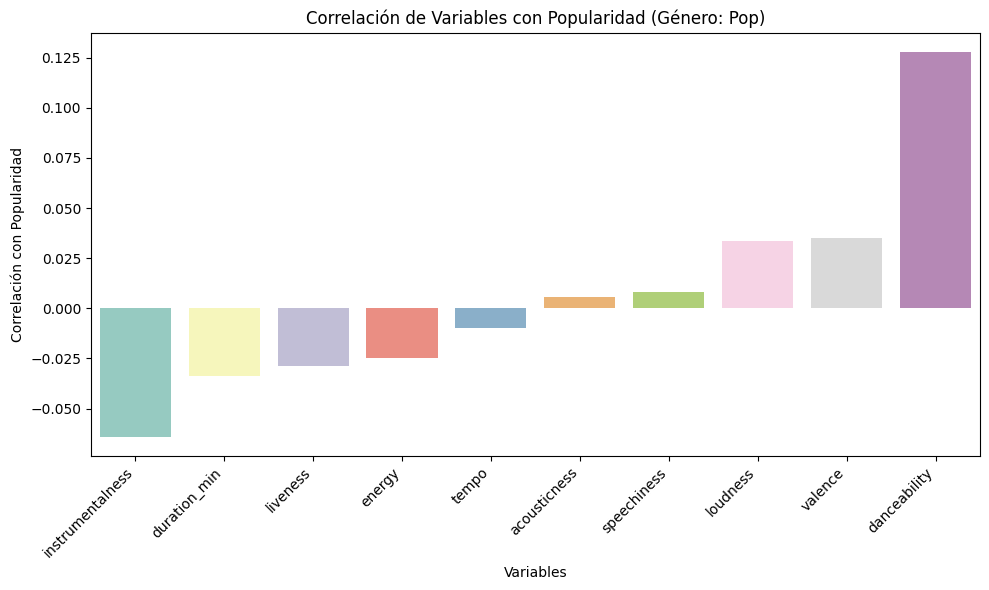

In [180]:
# Crea el gráfico de barras con los colores personalizados
df_features_genre_pop_corr=df_features[df_features['genre']=='Pop'].corr().loc[:,'popularity'][1:].sort_values()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_features_genre_pop_corr.index, y=df_features_genre_pop_corr, palette=colors)

# Personaliza el gráfico, como añadir etiquetas, título, etc.
plt.xlabel('Variables')
plt.ylabel('Correlación con Popularidad')
plt.title('Correlación de Variables con Popularidad (Género: Pop)')

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

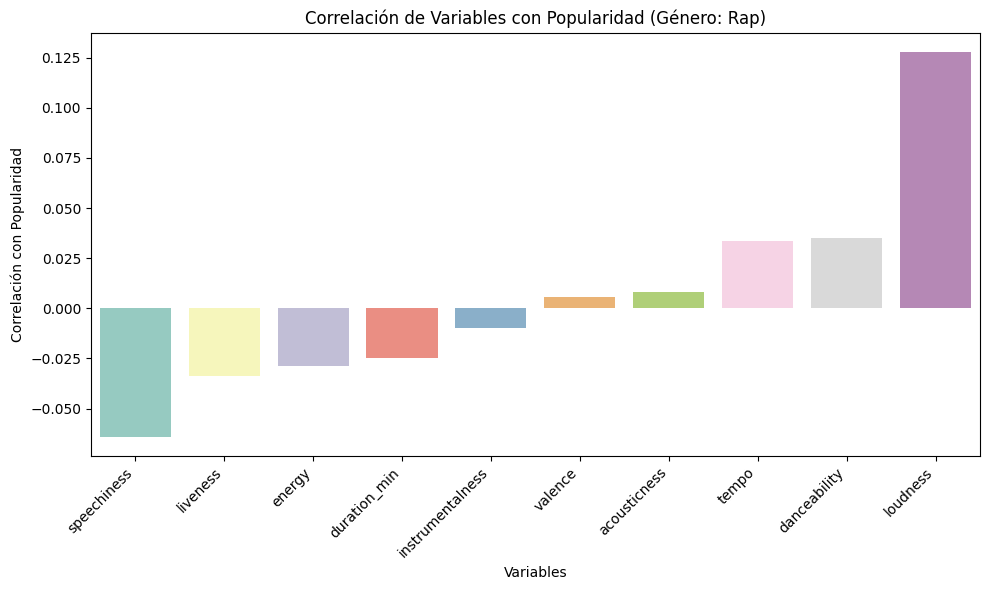

In [181]:
# Crea el gráfico de barras con los colores personalizados
df_features_genre_rap_corr=df_features[df_features['genre']=='Rap'].corr().loc[:,'popularity'][1:].sort_values()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_features_genre_rap_corr.index, y=df_features_genre_pop_corr, palette=colors)

# Personaliza el gráfico, como añadir etiquetas, título, etc.
plt.xlabel('Variables')
plt.ylabel('Correlación con Popularidad')
plt.title('Correlación de Variables con Popularidad (Género: Rap)')

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

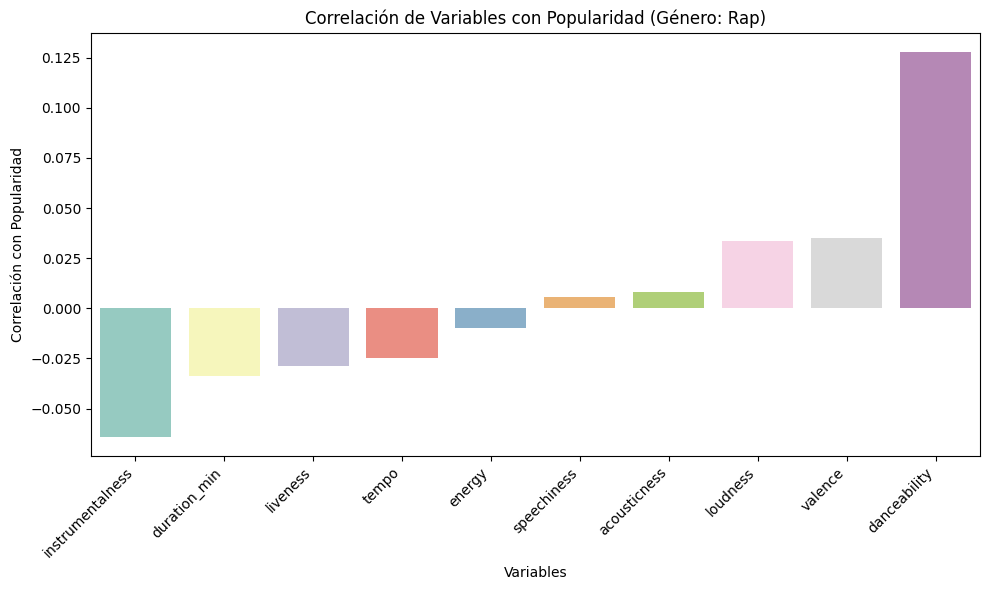

In [182]:
# Crea el gráfico de barras con los colores personalizados
df_features_genre_rock_corr=df_features[df_features['genre']=='Rock'].corr().loc[:,'popularity'][1:].sort_values()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_features_genre_rock_corr.index, y=df_features_genre_pop_corr, palette=colors)

# Personaliza el gráfico, como añadir etiquetas, título, etc.
plt.xlabel('Variables')
plt.ylabel('Correlación con Popularidad')
plt.title('Correlación de Variables con Popularidad (Género: Rap)')

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

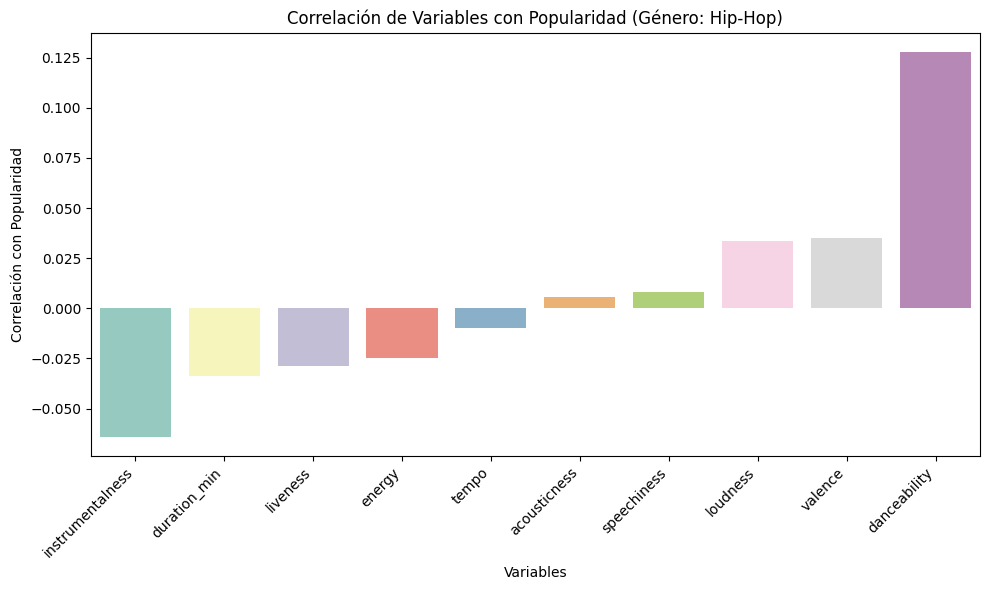

In [183]:
# Crea el gráfico de barras con los colores personalizados
df_features_genre_hiphop_corr=df_features[df_features['genre']=='Hip-Hop'].corr().loc[:,'popularity'][1:].sort_values()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_features_genre_pop_corr.index, y=df_features_genre_pop_corr, palette=colors)

# Personaliza el gráfico, como añadir etiquetas, título, etc.
plt.xlabel('Variables')
plt.ylabel('Correlación con Popularidad')
plt.title('Correlación de Variables con Popularidad (Género: Hip-Hop)')

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

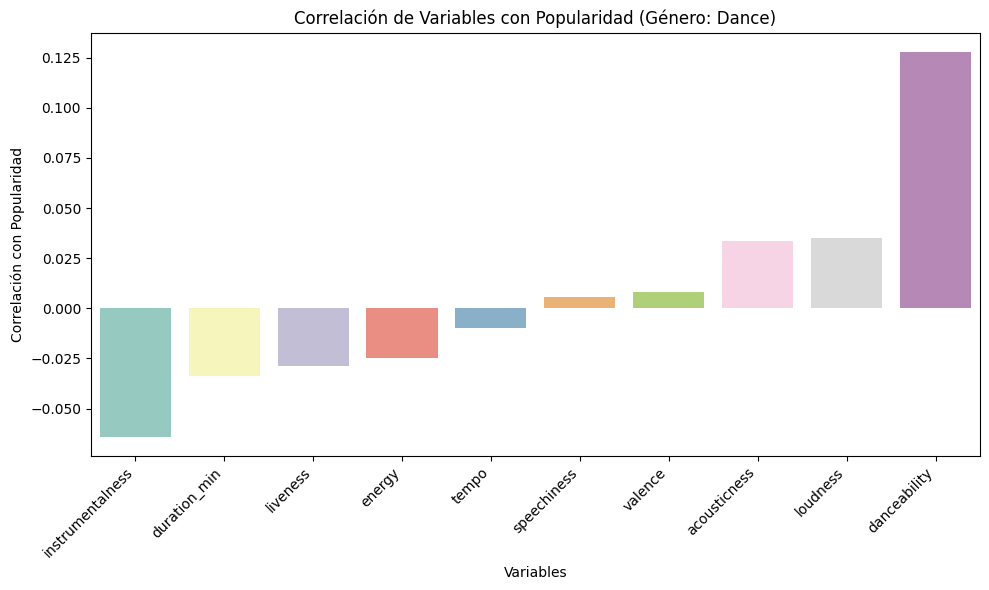

In [184]:
# Crea el gráfico de barras con los colores personalizados
df_features_genre_dance_corr=df_features[df_features['genre']=='Dance'].corr().loc[:,'popularity'][1:].sort_values()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_features_genre_dance_corr.index, y=df_features_genre_pop_corr, palette=colors)

# Personaliza el gráfico, como añadir etiquetas, título, etc.
plt.xlabel('Variables')
plt.ylabel('Correlación con Popularidad')
plt.title('Correlación de Variables con Popularidad (Género: Dance)')

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

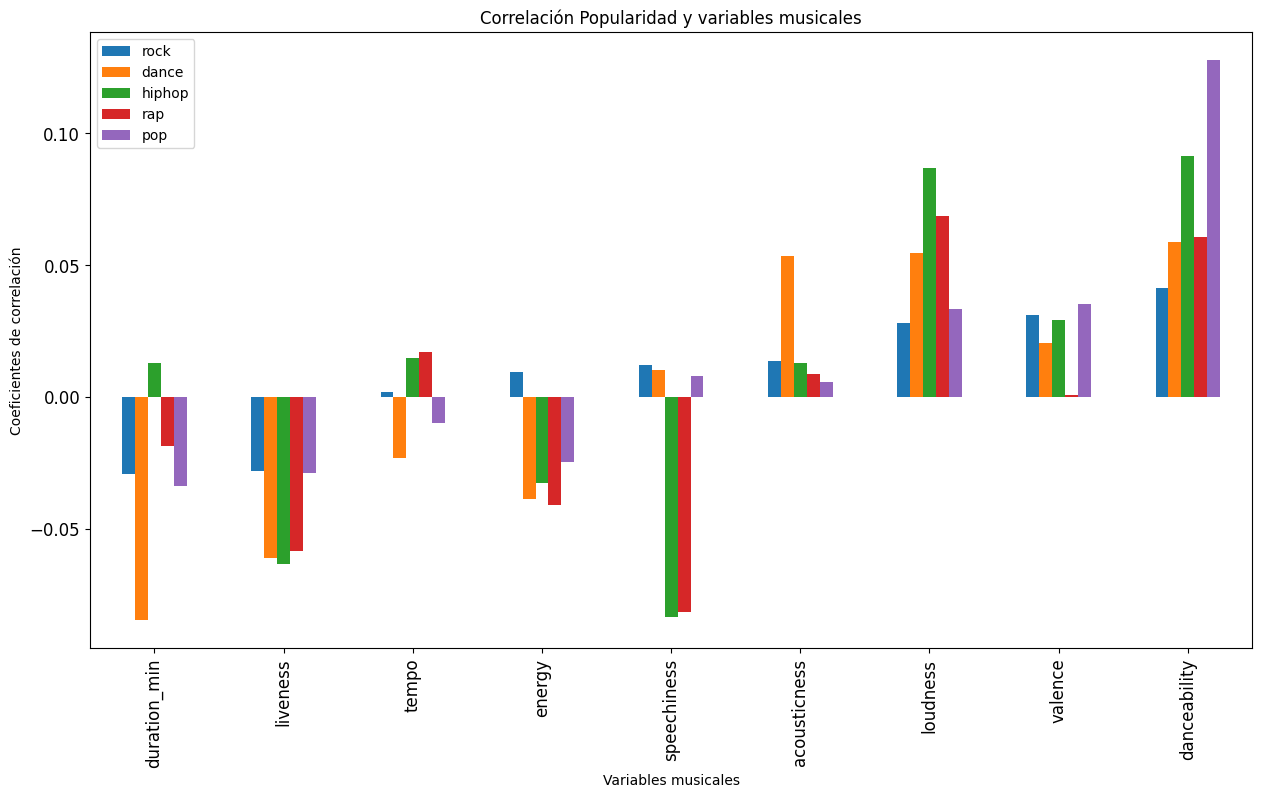

In [185]:
#gráfico de correlación de los principaples géneros con respecto a la popularidad
df_concatenated = pd.concat([df_features_genre_rock_corr, df_features_genre_dance_corr,df_features_genre_hiphop_corr,df_features_genre_rap_corr,df_features_genre_pop_corr],axis=1)
df_concatenated.columns=['rock','dance','hiphop','rap','pop']
ax = df_concatenated[1:].plot(kind='bar',figsize=(15,8))
ax.tick_params(axis='both', labelsize=12)
ax.set_title('Correlación Popularidad y variables musicales')
ax.set_xlabel('Variables musicales')
ax.set_ylabel('Coeficientes de correlación')
plt.show()

### 6.3.7 Análisis de la duración vs género

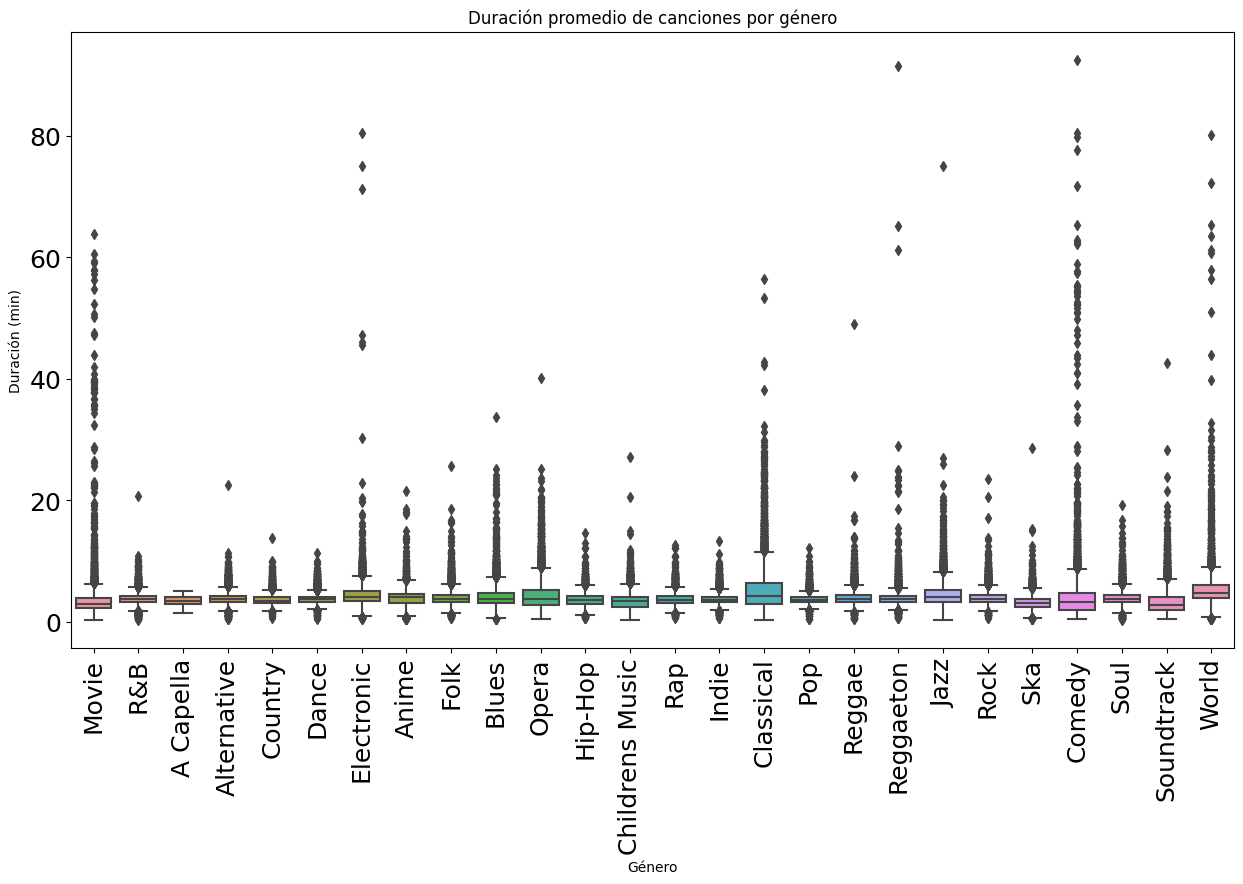

In [186]:
fig, ax = plt.subplots(figsize=(15, 8))

ax=sns.boxplot( x = df_features['genre'], y = df_features["duration_min"])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='both', labelsize=18)

plt.xlabel('Género')
plt.ylabel('Duración (min)')
plt.title('Duración promedio de canciones por género')

plt.show()

A nivel grafico se observa la presencia de outliers o valores atípicos, por ello vamos a tratarlos y reemplazarlos por la media dar una mejor vista gráfica

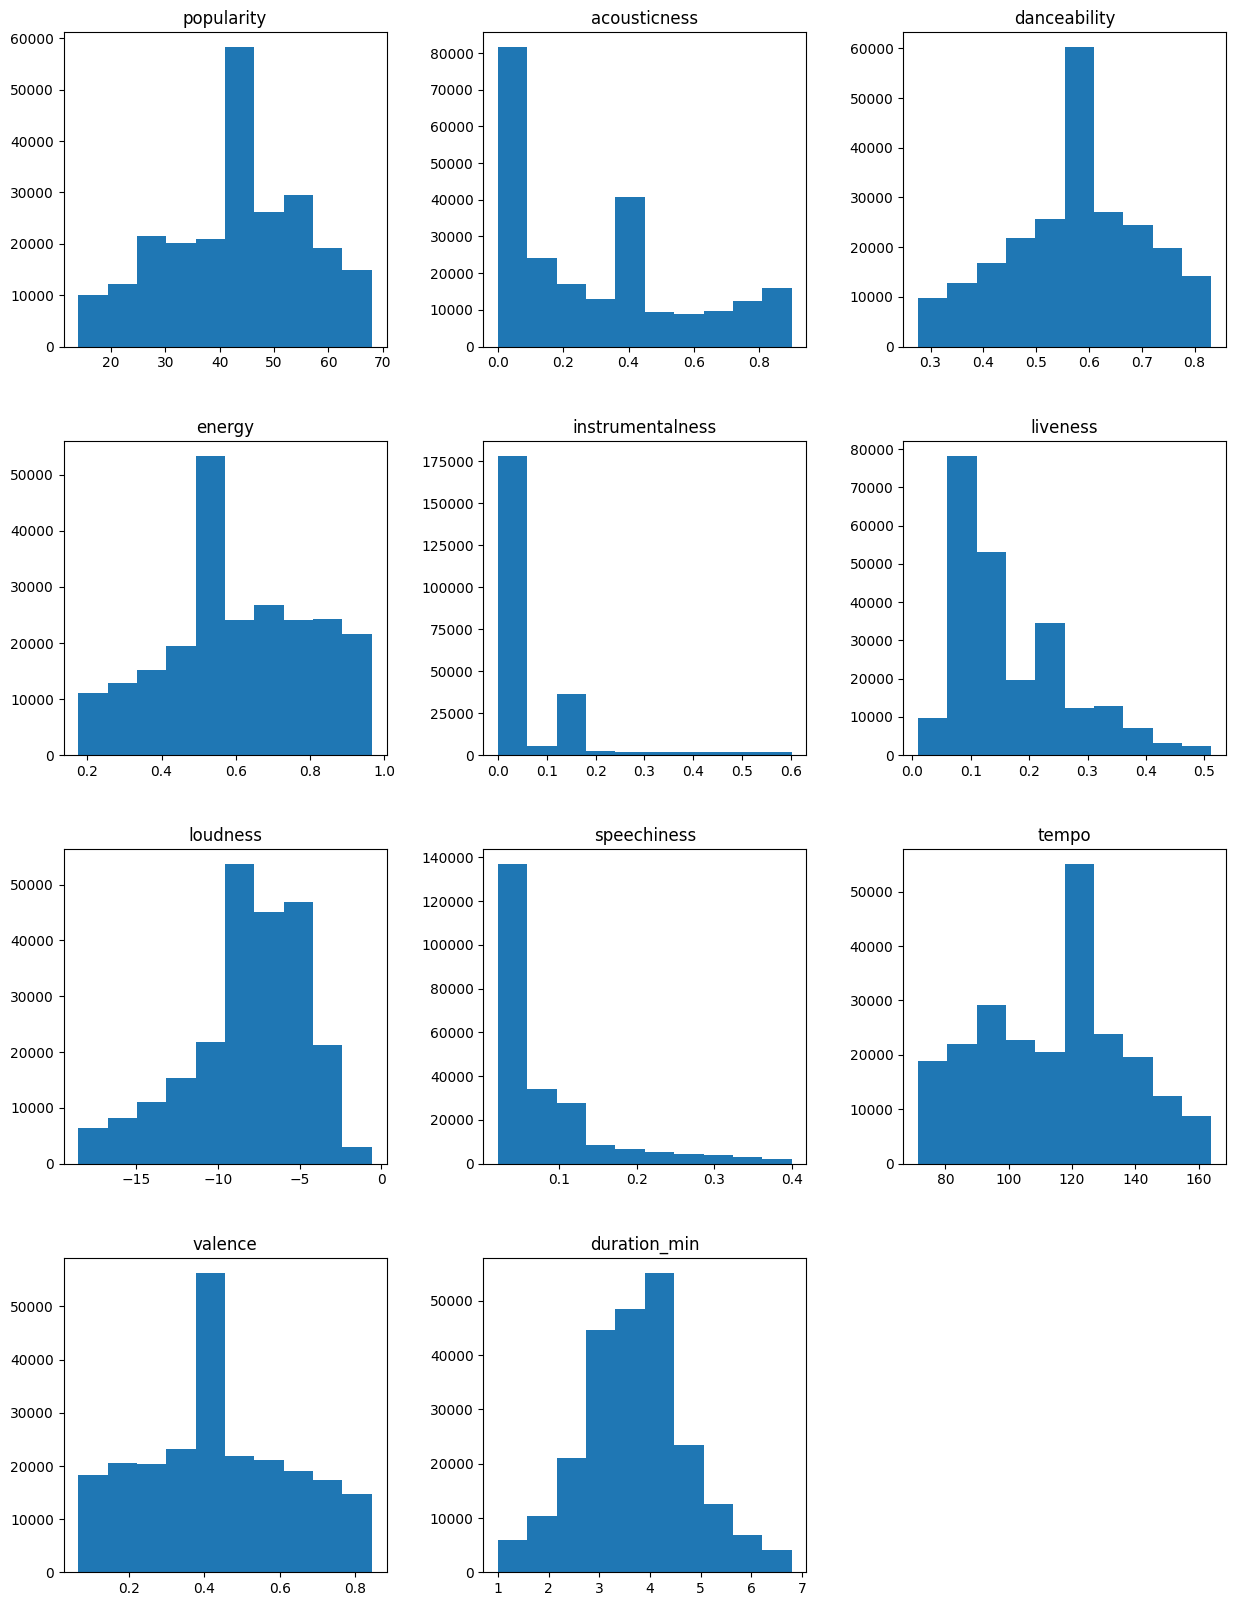

In [187]:
parametro = 1.5
df_features_numericas = df_features.select_dtypes(include=['float', 'int'])

# Crear una copia del DataFrame para evitar modificar el original
df_features_numericas_sin_outliers = df_features_numericas.copy()

for col in df_features_numericas.columns:
    media = df_features_numericas[col].mean()
    std_dev = df_features_numericas[col].std()
    
    # Filtrar los outliers utilizando el parámetro y la desviación estándar
    mask = abs(df_features_numericas[col] - media) > parametro * std_dev
    df_features_numericas_sin_outliers.loc[mask, col] = media

# Dibujar histogramas de las columnas sin outliers
df_features_numericas_sin_outliers.hist(figsize=(15, 20), grid=False)
plt.show()

### 6.3.8 Análisis de normalidad de las variables numéricas ###

In [189]:
results = []

for col in df_features_numericas:
    stat, p = shapiro(df_features_numericas[col])
    normal_distribution = p > 0.05

    result = {
        'Feature': col,
        'Estadístico de Prueba': stat,
        'Valor p': p,
        'Distribución Normal': normal_distribution

    }
    results.append(result)

# Crear un DataFrame a partir de la lista de resultados
df_results = pd.DataFrame(results,)

# Mostrar el DataFrame con los resultados
df_results

,Feature,Estadístico de Prueba,Valor p,Distribución Normal
0,popularity,0.982613,0.0,False
1,acousticness,0.848045,0.0,False
2,danceability,0.984247,0.0,False
3,energy,0.958989,0.0,False
4,instrumentalness,0.533785,0.0,False
5,liveness,0.718667,0.0,False
6,loudness,0.851657,0.0,False
7,speechiness,0.509510,0.0,False
8,tempo,0.978555,0.0,False
9,valence,0.966497,0.0,False
